This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 20 embryo particles with calculated initial status according to the hypothesis, whose mass are $3M_{\oplus}$ respectively.

After that we, considering the collision and merger, integrate the system for a preinstall long time units and plot the figure.

In [1]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e3*2.*np.pi

#np.random.seed(12)

In [2]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [3]:
# Embryos
# 行星胚胎群 a = 10 AU
n_embryos = 20
e = random.randint(1,10)*0.001*np.pi/180
inc = random.randint(1,10)*0.001*np.pi/180
Omega = random.randint(0,360)*np.pi/180
omega = random.randint(0,360)*np.pi/180
m = 3*3.040432648022642e-06
rho = 3
r = (((m*1.988e33)/(4*np.pi))**(1/3))/1.4960e13
a_default = 10 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.7 * hillradii + 10 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, inc = inc, Omega = Omega, omega = omega, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [4]:
sim.status()
print(r)

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	23
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7ff25cde2bf8, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7ff25cde27b8, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7ff25cde2bf8, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7ff25cde27b8, m=9.121297944067926e-06 x=-6.570790412966749 y=6.542802205364209 z=0.00029133057808573354 vx=-0.23172230007827532 vy=-0.23225206489718114 vz=-1.3764294896894389e-05>
<rebound.particle.Particle object at 0x7ff25cde2bf8, m=9.121297944067926e-06 x=8.969427630251879 y=-2.749289946058403 z=-7.722441222

In [5]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06
9.121297944067926e-06


In [6]:
sim.move_to_com()
E0 = sim.calculate_energy()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-d67gkd_8 because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


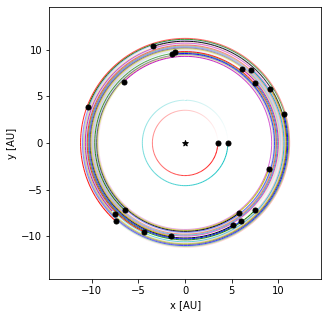

In [7]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [8]:
sim.getWidget(size=(500,300),scale=3.0*a_saturn)

Widget(N=23, count=2, height=300.0, orbit_data=b'\xbfI\x9f\xbb\x88.r8\xa6`\xc40\x00\x00`@M\xc9_%\xdb\x0fI@\xdb…

In [9]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

1.229144127782073e-06


In [10]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	22
Selected integrator: 	mercurius
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7ff290c21f28, m=1.0 x=-0.0008190914299523985 y=0.0030040412165908857 z=-9.734706745788055e-09 vx=-0.0004918538986003094 vy=-9.822302446684589e-05 vz=-4.9780677875484734e-11>
<rebound.particle.Particle object at 0x7ff290c21e18, m=0.0009547919152112404 x=-0.18092901917098494 y=-3.4661091455314295 z=-2.1954719493169072e-08 vx=0.5367531059846339 vy=-0.025363750391342428 vz=-2.0748197352637506e-07>
<rebound.particle.Particle object at 0x7ff290c21f28, m=0.0002858856727222417 x=4.647858248906497 y=0.46141764904939386 z=-2.5914168299936855e-06 vx=-0.05203405720298536 vy=0.45779254543952447 vz=1.378183333036989e-07>
<rebound.particle.Particle object at 0x7ff290c21e18, m=9.121297944067926e